# EDA on Netflix Dataset

## **`Table of Contents`**

1. [**Introduction**](#1)
   1. [**1.1 Project Description**]
   2. [**1.2 Data Description**]
2. [**Acquiring and Loading Data**](#2)
   1. [**2.1 Importing Libraries:**]
   2. [**2.2 Loading Data**]
   3. [**2.3 Basic Data Exploration**]
   4. [**2.4 Areas to Fix**]
3. [**Data Proprocessing**](#3)
   1. [**3.1 Pre-processing Details:**]
   2. [**3.2 Rename Columns**]
   3. [**3.3 Drop Redundant Columns**]
   4. [**3.4 Changing Data Types**]
   5. [**3.5 Dropping Duplicates**]
   6. [**3.6 Handling Missing Values**]
   7. [**3.7 Handling Unreasonable Data Ranges**]
   8. [**3.8 Feature Engineering / Transformation**]
4. [**Data Analysis**](#4)
   1. [**4.1 Exploring `Column Name`**]
5. [**Conclusion**](#5)
   1. [**5.1 Insights**]
   2. [**5.2 Suggestions**]
   3. [**5.3 Possible Next Steps**]
6. [**Epilogue**](#6) 
   1. [**6.1 References**]
   2. [**6.2 Information about the Author:**]

---

# **`1. Introduction`**
 


[<img src="https://storage.googleapis.com/kaggle-datasets-images/434238/824878/30c0ef57882454a0419a348088aa2306/dataset-thumbnail.jpg?t=2019-12-04-06-00-44">]

##  **1.1 Project Description**

**Goal/Purpose:** 

This project is an Exploratory Data Analysis (EDA) on the dataset "netflix_titles.csv" which contains information about various movies and TV shows available on the Netflix platform. The goal of this project is to provide insights and understanding about the dataset, which can be useful for various purposes such as content recommendation, trend analysis, and business strategy.

The purpose of this notebook is to guide you through the EDA process and help you practice your data analysis skills. By exploring and analyzing this dataset, you can learn how to extract valuable information, identify patterns, and draw meaningful conclusions. This project is important for someone to read as it can serve as a reference for conducting EDA on similar datasets, and it can also help you improve your data analysis and problem-solving abilities.

<p>&nbsp;</p>

**Questions to be Answered:**



**`Question No 01:`** What is the distribution of the "type" column (movie vs. TV show) over the years?

**`Question No 02:`** Which countries have the most content available on Netflix, and how has this changed over time?

**`Question No 03:`** What are the most common genres or "listed_in" categories for movies and TV shows, and how do they differ?

**`Question No 04:`** How has the average duration of movies and TV shows changed over the years?

**`Question No 05:`** Which directors or actors have the most titles in the dataset, and are there any trends or patterns in their content?

**`Question No 06:`** Are there any relationships between the rating, duration, and genre of the Netflix titles?

**`Question No 07:`** How does the distribution of release years differ between movies and TV shows?

**`Question No 08:`** Can you identify any seasonal or monthly patterns in the release of new content on Netflix?

**`Question No 09:`** Are there any notable differences in the distribution of titles between the "Documentaries", "Dramas", and "Comedies" genres?

**`Question No 10:`** Can you find any significant correlations between the variables in the dataset, and how might these insights be useful for content recommendation or marketing strategies?

<p>&nbsp</p>

**Assumptions:** 

- The dataset is complete and accurate, with no major missing data or errors.
- The date_added column accurately represents when the title was added to Netflix.
- The metadata (director, cast, country, etc.) is reliable and up-to-date.
  
**Methodology:**

- Perform data cleaning and preprocessing (handle missing values, convert data types, etc.)
- Conduct univariate and bivariate analysis to understand the distribution and relationships between variables.
- Explore the data using visualization techniques (e.g., histograms, scatter plots, bar charts) to identify patterns and trends.
- Perform statistical analysis (e.g., correlation, regression) to uncover deeper insights.
- Document the findings and insights in a clear and organized manner.

**Scope:**

- This project will focus on analyzing the Netflix titles dataset and providing insights that can be useful for content providers, subscribers, and researchers.
- The analysis will be limited to the information available in the provided dataset and will not include any external data sources.
- The goal is to practice EDA skills and provide a comprehensive understanding of the Netflix content landscape.

<p>&nbsp;</p>

## **1.2 Data Description**

**Content:** 

This dataset is a CSV (Comma-Separated Values) file of 10 data points which contains information about various movies and TV shows available on the Netflix platform.

**Description of Attributes:**

| Column       | Description                                                                                                    |
| ------------ | -------------------------------------------------------------------------------------------------------------- |
| show_id      | Unique identifier for each title                                                                           |
| type         | Indicates whether the title is a movie or a TV show                                                       |
| title        | Title of the movie or TV show                                                                              |
| director     | Director of the movie                                                                                      |
| cast         | Actors in the movie or TV show                                                                             |
| country      | Country where the title was produced                                                                       |
| date_added   | Date the title was added to Netflix                                                                        |
| release_year | Year the title was originally released                                                                     |
| rating       | Content rating of the title                                                                                |
| duration     | Runtime of the movie or number of seasons for TV shows                                                     |
| listed_in    | Genres or categories the title belongs to                                                                  |
| description  | Brief description of the plot or premise of the title                                                      |

**Acknowledgements:**

This dataset is provided by Netflix. The original dataset was scraped by Kaggle and the original source can be found on [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows).

---

# **`2. Aquiring & Loading Data`**
 

In [1]:
# pip install ipywidgets

In [2]:
# 2.0 Interactive Output Function
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

def print_interact(show_summary, df):
  interact(show_summary, df=widgets.fixed(df))

## **2.1 Importing Libraries:**

In [18]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
from skimpy import skim

## **2.2 Loading Data**

In [4]:
# # Load DataFrames
df = pd.read_csv('./data/netflix.csv')

## **2.3 Basic Data Exploration**

In [5]:
# # Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 8807
Columns count: 12


In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### *2.3.1 Check Data Types*

In [8]:
# # Show data types
def info_of_data():
    df.info()
print_interact(info_of_data,df)



interactive(children=(Output(),), _dom_classes=('widget-interact',))

- `release_year` is an **integer**.
- `date_added` should be a **datetime** type instead.
- `remaining all` columns are **strings**.

### *2.3.2 Check Missing Data*

In [57]:
# Print percentage of missing values

def missing_values():
    missing_percent = df.isnull().sum().sort_values(ascending=False)
    if(missing_percent.sum()):
        print('---- Percentage of Missing Values (%) -----')
        print(missing_percent[missing_percent>0]/len(df)*100)
    else:
        print('None')
print_interact(missing_values,df)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

### 2.3.3 Check for Duplicate Rows

In [11]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# Show duplicated rows
df[df.duplicated()]

No. of entirely duplicated rows: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### 2.3.4 Check Uniqueness of Data

In [15]:
print_interact(lambda df: df.nunique(), df)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [17]:
print_interact(lambda df: print(100/df.nunique().sort_values()),df)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

### *2.3.5 Check Data Range*

In [19]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### *2.3.6 Checking Value Counts of Categorical Columns*

In [37]:
# checking value counts of df for categorical columns   
print('---- Value Counts -----')
for col in df.select_dtypes(include='object').columns:
    if(df[col].nunique()<40):
        print(f'---- {col} ----')
        print(df[col].value_counts())

---- Value Counts -----
---- type ----
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
---- rating ----
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


## **2.4 Areas to Fix**
**Data Types**
- [the duration column should be of numeric dtype, and of one scale]
- [date added column should be of datetime dtype]

**Missing Data**

| column_name | NA | NA % |
|----------------|:--:|:----:|
| show_id | 0 | 0 |
| type | 0 | 0 |
| title | 0 | 0 |
| director | 2634 | 29.91 |
| cast | 825 | 9.37 |
| country | 831 | 9.44 |
| date_added | 10 | 0.11 |
| rating | 4 | 0.05 |
| duration | 3 | 0.03 |
| listed_in | 0 | 0 |
| description | 0 | 0 |

**Duplicate Rows**
- [There are no duplicated rows]

**Uniqueness of Data**
|Column_name|nunique(%)
--------|--------
|type|50.000000|
|rating|5.882353|
|release_year|1.351351|
|duration|0.454545|
|listed_in|0.194553|
|country|0.133690|
|date_added|0.056593|
|director|0.022085|
|cast|0.013001|
|description|0.011396|
|show_id|0.011355|
|title|0.011355|

---

# **`3. Data Preprocessing`**

## **3.1 Pre-processing Details:**

- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Engineering / Transformation

## **3.2 Rename Columns**

In [38]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
# renaming the listed_in column to categories
df.rename(columns={'listed_in':'categories'},inplace=True)

In [42]:
# Verify columns are renamed
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'categories', 'description'],
      dtype='object')

## **3.3 Drop Redundant Columns**

#### **`There are no redundant columns to drop.`**

## **3.4 Changing Data Types**

In [48]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  categories    8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [24]:
# # Verify conversion
# assert ptypes.is_string_dtype(df[col])
# assert ptypes.is_numeric_dtype(df[col])
# cols_to_check = []
# assert all(ptypes.is_datetime64_any_dtype(df[col]) for col in cols_to_check)

## **3.5 Dropping Duplicates**

#### **`There are no dublicate row.`**

## **3.6 Handling Missing Values**

In [63]:

# Handle missing values
# 1. Fill missing 'country' values with the most common country
df['country'] = df['country'].fillna(df['country'].mode()[0])

# 2. Fill missing 'cast' values with an empty string
df['cast'] = df['cast'].fillna('')

# 3. Fill missing 'date_added' values with the median date
df['date_added'] = df['date_added'].fillna(df['date_added'].median())

# 4. Fill missing 'rating' values with the most common rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# 5. Extract the numeric part of the 'duration' column using a different approach
df['duration_numeric'] = df['duration'].str.extract(r'(\d+)', expand=False).astype(float)

# 6. Fill missing 'duration_numeric' values with the median
df['duration_numeric'] = df['duration_numeric'].fillna(df['duration_numeric'].median())

# 7. Update the 'duration' column with the filled numeric values
df['duration'] = df['duration_numeric'].astype(str) + ' min'

# 8. Fill missing 'director' values with 'Unknown'
df['director'] = df['director'].fillna('Unknown')


In [108]:
# Verify missing values are handled
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
categories          0
description         0
duration_numeric    0
z_score             0
dtype: int64

### **3.6.1 Check the missing value**

# **Dealing with  Outliers**

In [86]:
# Calculate the percentage of outliers using Interquartile Range (IQR)
q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = df[(df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)]['release_year']
percentage_outliers_iqr = (len(outliers_iqr) / len(df)) * 100
print(f"Percentage of outliers using IQR: {percentage_outliers_iqr:.2f}%")

Percentage of outliers using IQR: 0.00%


<Axes: ylabel='release_year'>

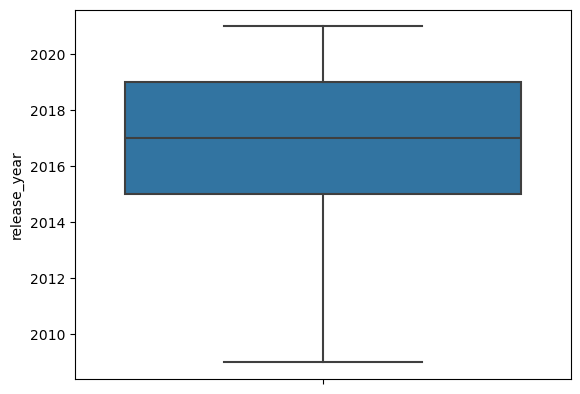

In [88]:
# makking a box plot of release year
sns.boxplot( y='release_year', data=df)

# **4. Data Analysis**
 

### **`Question No 01:`** What is the distribution of the "type" column (movie vs. TV show) over the years?

In [105]:

# Group by year and count movie/TV show occurrences
type_counts = df.groupby([df['release_year'], df['type']]).size().unstack(fill_value=0)

# Print the results
print(type_counts)

type          Movie  TV Show
release_year                
2009            118       34
2010            154       40
2011            145       40
2012            173       64
2013            225       63
2014            264       88
2015            398      162
2016            658      244
2017            767      265
2018            767      380
2019            633      397
2020            517      436
2021            277      315


In [103]:
# Group by year and count movie/TV show occurrences
type_counts = df.groupby([df['release_year'], df['type']]).size().unstack(fill_value=0)

# Calculate the percentage distribution
type_percentages = type_counts.div(type_counts.sum(axis=1), axis=0) * 100

# Print the results
print(type_percentages.round(1))

type          Movie  TV Show
release_year                
2009           77.6     22.4
2010           79.4     20.6
2011           78.4     21.6
2012           73.0     27.0
2013           78.1     21.9
2014           75.0     25.0
2015           71.1     28.9
2016           72.9     27.1
2017           74.3     25.7
2018           66.9     33.1
2019           61.5     38.5
2020           54.2     45.8
2021           46.8     53.2


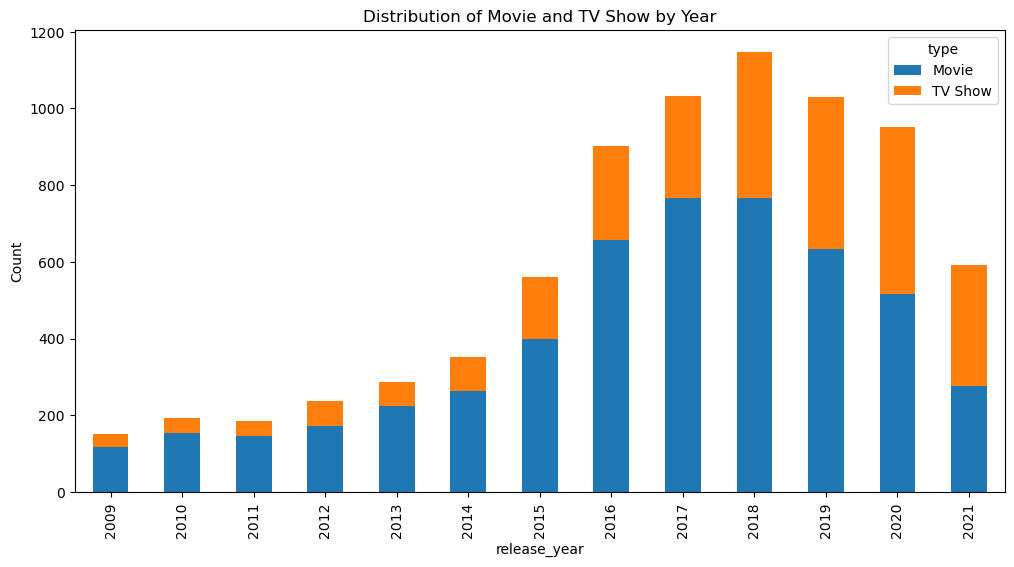

In [96]:

# Create a pivot table to get the counts of movie and TV show by year
type_counts = df.pivot_table(index='release_year', columns='type', values='show_id', aggfunc='count', fill_value=0)

# Plot the stacked bar chart
type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Movie and TV Show by Year')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()

### **`Question No 02:`** Which countries have the most content available on Netflix, and how has this changed over time?

In [109]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'categories', 'description',
       'duration_numeric', 'z_score'],
      dtype='object')

In [116]:


# Group the data by country and count the number of titles
country_counts = df.groupby('country')['show_id'].count().sort_values(ascending=False)

# Print the top 5 countries with the most content
print("Top 5 Countries by Netflix Content:")
print(country_counts.head(10))

Top 5 Countries by Netflix Content:
country
United States     3136
India              759
United Kingdom     386
Japan              205
South Korea        198
Canada             173
Spain              144
France             120
Mexico             102
Turkey              96
Name: show_id, dtype: int64


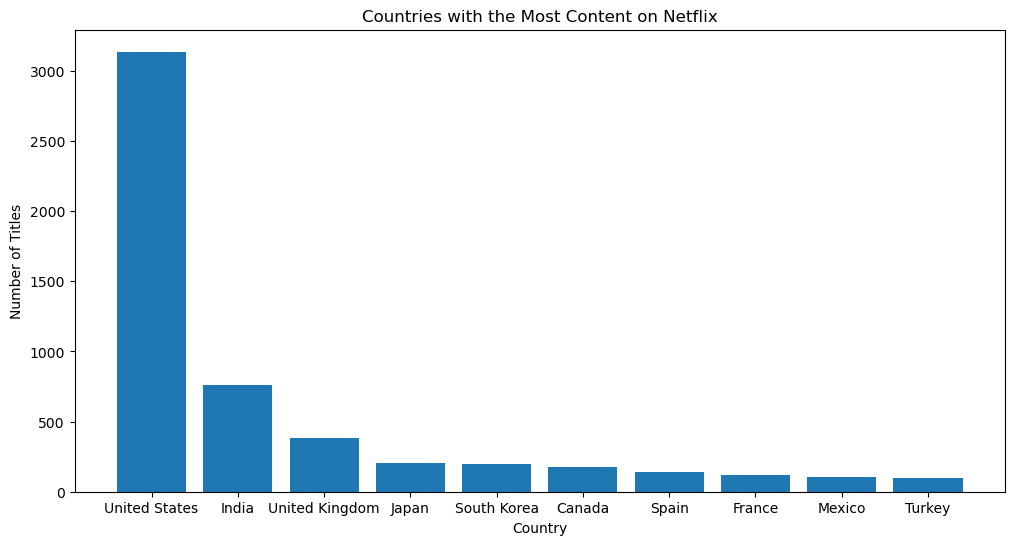

In [132]:
# Sample data
countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Mexico', 'Turkey']
counts = [3136, 759, 386, 205, 198, 173, 144, 120, 102, 96]

# Create the chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(countries, counts)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of Titles')
ax.set_title('Countries with the Most Content on Netflix')
plt.show()

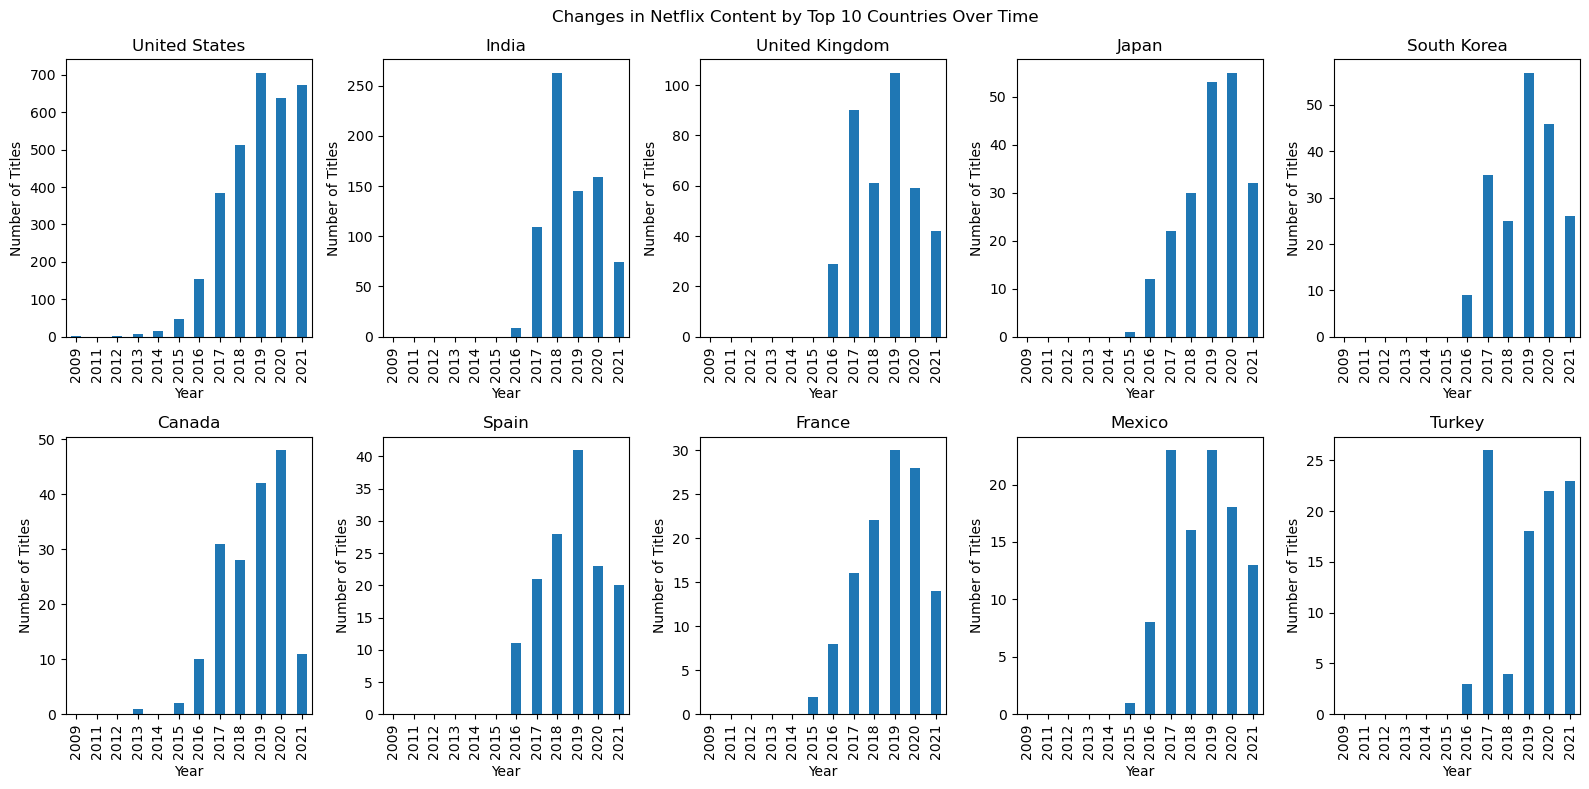

In [115]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Group the data by country and count the number of titles added each year
country_counts = df.groupby(['country', df['date_added'].dt.year])['show_id'].count().unstack(fill_value=0)

# Find the top 10 countries by total content
total_counts = country_counts.sum(axis=1).sort_values(ascending=False)
top_countries = total_counts.head(10).index.tolist()

# Create a figure with subplots to show the changes over time
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Plot the changes for each of the top 10 countries
for i, country in enumerate(top_countries):
    row, col = i // 5, i % 5
    country_data = country_counts.loc[country]
    country_data.plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(country)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Number of Titles')

plt.suptitle('Changes in Netflix Content by Top 10 Countries Over Time')
plt.tight_layout()
plt.show()


### **`Question No 03:`** What are the most common genres or "listed_in" categories for movies and TV shows, and how do they differ?


### **`Question No 04:`** How has the average duration of movies and TV shows changed over the years?

### **`Question No 05:`** Which directors or actors have the most titles in the dataset, and are there any trends or patterns in their content?

### **`Question No 06:`** Are there any relationships between the rating, duration, and genre of the Netflix titles?

### **`Question No 07:`** How does the distribution of release years differ between movies and TV shows?

### **`Question No 08:`** Can you identify any seasonal or monthly patterns in the release of new content on Netflix?

### **`Question No 09:`** Are there any notable differences in the distribution of titles between the "Documentaries", "Dramas", and "Comedies" genres?


### **`Question No 10:`** Can you find any significant correlations between the variables in the dataset, and how might these insights be useful for content recommendation or marketing strategies?


## **4.1 Exploring `Column Name`**

In [32]:
# Code and visualization

**Observations**
- Ob 1
- Ob 2
- Ob 3

---

# **`5. Conclusion`**
 



## **5.1 Insights**
State the insights/outcomes of your project or notebook.

## **5.2 Suggestions**

Make suggestions based on insights.

## **5.3 Possible Next Steps**
Areas to expand on:
- (if there is any)

---

# *`6. Epilogue`*

## **6.1 References**

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Author (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

---

## **6.2 Information about the Author:**

[<img src="https://media.licdn.com/dms/image/D4D03AQH8PR9DDb3VxQ/profile-displayphoto-shrink_200_200/0/1713280211622?e=2147483647&v=beta&t=5TpzxNZJRmU3_zjNLoRb-O2V9amv1-1rwM5OczG01ZY" width="20%">](https://www.facebook.com/groups/codanics/permalink/1872283496462303/ "Image")


**Mr. ShaheerAli**

BS Computer Science\
[Youtube channel](https://www.youtube.com/channel/UCUTphw52izMNv9W6AOIFGJA)\
[Twitter](https://twitter.com/__shaheerali190)\
[Linkedin](https://www.linkedin.com/in/shaheer-ali-2761aa303/)\
[github](https://github.com/shaheeralics)\
[Kaggle](https://www.kaggle.com/shaheerali197)\
[Portfolio Website](https://shaheer.kesug.com)

## **6.3 Versioning**
Notebook and insights by (Mr.Shaheer Ali).
- Version: 1.5.0
- Date: 2023-05-15